# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

**Question 1**: What are we accomplishing with `as` reserved word?

Using `as` means you're aliasing a module. It's used to change the name of the module within the scope of your Python program. In the example shown above, it is used to abbreviate the names of the imported modules.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [2]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print df.head(10)    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   
5           Ford Galaxie 500  15.0          8         429.0         198   
6           Chevrolet Impala  14.0          8         454.0         220   
7          Plymouth Fury iii  14.0          8         440.0         215   
8           Pontiac Catalina  14.0          8         455.0         225   
9         AMC Ambassador DPL  15.0          8         390.0         190   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433     

**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

The default value passed to the `head()` method is 5, if we pass 10 it outputs the first 10 rows (`print df.head(10)`).
The column types are, respectively: string, float, integer, integer, integer, integer, float, integer, string. 

There are different ways of exploring and indexing the table. Here are some examples.

In [3]:
print list(df.columns)
print df[0:5]         # print the first 5 rows, same outcome as df.head()
print df[['Car', 'MPG']][:10]  # print the first 10 rows for selected columns
print df[df['MPG'] > 40]   # using Boolean condition, print only cars with MPG > 40
print df.iloc[[0,1,5],0:5]   # uses 'ix' indexing, selects rows and columns based on their location in the table

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  
                         Car   MPG
0  Chevrolet Chevelle Malibu  18.0
1          Buick Skylark 320  15.0
2         Plymouth Satellite  18.0
3              AMC Rebel SST  16.0
4                Ford Torino  1

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.

In [4]:
#first method
rows = len(df.index)
print df[rows-5:]  

#second method
print df.tail(5)
    

                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ranger  28.0          4         120.0          79    2625   
405         Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model  Origin  
401          15.6     82      US  
402          24.6     82  Europe  
403          11.6     82      US  
404          18.6     82      US  
405          19.4     82      US  
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ran

In [5]:
print df['Car'][df['Cylinders'] == 3] 

78     Mazda RX2 Coupe
118          Mazda RX3
250         Mazda RX-4
341      Mazda RX-7 GS
Name: Car, dtype: object


Now, we are ready to start plotting the data.

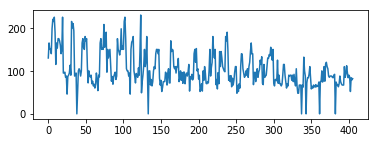

In [46]:
plt.figure(figsize=(6,2))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

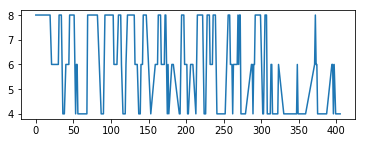

In [48]:
plt.figure(figsize=(6,2))
plt.plot(df['Cylinders'][df['Origin'] == 'US'])

To plot the histogram of a selected attribute:

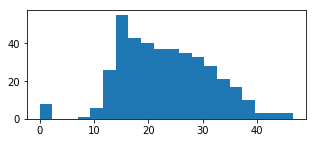

In [50]:
fig = plt.figure(figsize=(5,2))
plt.hist(df['MPG'], bins=20);   # ; suppresses Out
#plt.hist(df['Cylinders'], bins=20) 

(array([  4.,   0.,  69.,   0.,   0.,   6.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 6 Patch objects>)

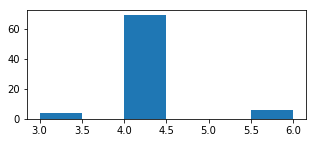

In [53]:
fig = plt.figure(figsize=(5,2))
plt.hist(df['Cylinders'][df['Origin'] == 'Japan'], bins=6) 

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why. 

It is possible to conclude that most cars have MPG at around 15, since it is the tallest bar in the histogram. 

For the histogram regarding MPGs, 20 bins is great because it is possible to see a profile forming and get a sense that fewer cars have bigger MPGs. Once we increase this number, we begin to see a separation between MPGs that are numeric close and the plot doesn't do its job properly.

For the histogram regarding Cylinders, since we have only few cylinder options, few bins get the job done.

The following code provides statistics for number of cylinders.

In [10]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print t

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

In [40]:
f = pd.crosstab(df["Cylinders"],df["Model"])  
print f

Model      70  71  72  73  74  75  76  77  78  79  80  81  82
Cylinders                                                    
3           0   0   1   1   0   0   0   1   0   0   1   0   0
4           8  14  14  11  15  12  15  14  17  12  25  22  28
5           0   0   0   0   0   0   0   0   1   1   1   0   0
6           4   8   0   8   7  12  10   5  12   6   2   7   3
8          23   7  13  20   5   6   9   8   6  10   0   1   0


Horizontal bar plot:

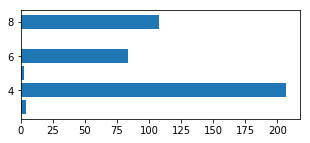

In [31]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"]);

ValueError: shape mismatch: objects cannot be broadcast to a single shape

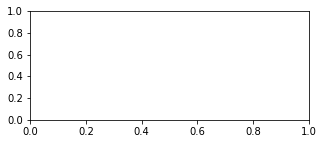

In [45]:
plt.figure(figsize=(5,2))
plt.barh(f.index, f.columns);

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

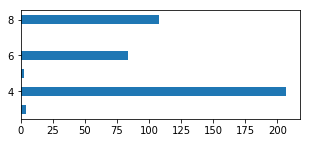

In [13]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"],0.5);

Pie chart:

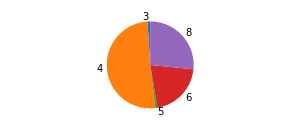

In [14]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

**Question 8**: Do you prefer bar or pie displayed chart and why?

I prefer bar chart because quantities are clearer than on pie charts, since bar chart uses height and pie chart uses area.

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

/Users/samuel/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


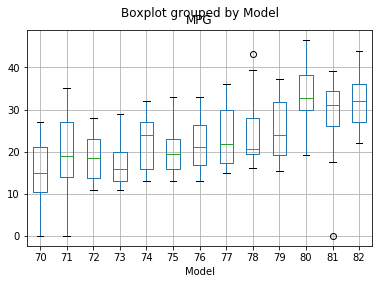

In [15]:
df.boxplot(column='MPG',by='Model');

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?

It shows the average, maximum, minimum and standard deviation of MPG for each year.

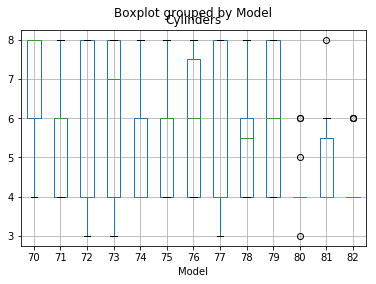

In [47]:
df.boxplot(column='Cylinders',by='Model');

In the above boxplot it's possible to see the trend to make cars lighter over the years.

Scatterplot between MPG and Weight attributes:

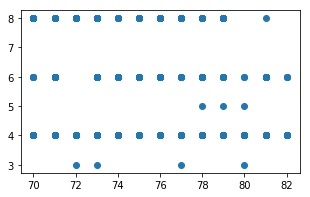

In [29]:
plt.figure(figsize=(5,3))
plt.scatter(df['Model'],df['Cylinders']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.  

In the plot it is possible to see that as cars get lighter, their MPG grows larger.

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

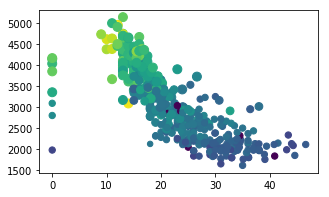

In [18]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

In addition to the information we had in the previous scatter plot, now the marker size is mapped to the number of cylinders, so bigger markers have more cylinders, also, the color of the marker is mapped to the horsepower and we can see that cars that weight more have also, predictably, more horsepower.

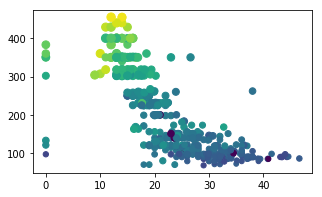

In [19]:
plt.figure(figsize=(5,3))
plt.scatter(df['Model'],df[''],df['Weight']/70,df['Horsepower']);

In the scatter plot above we can see that cars with big MPG have less displacement, are lighter and have less horsepower.

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

/Users/samuel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


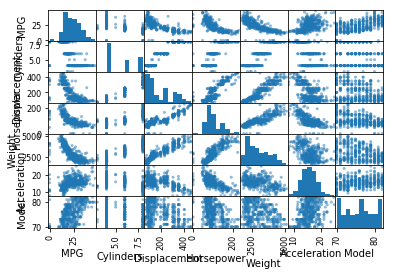

In [20]:
pd.scatter_matrix(df);

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

In the plot above we can scatter plots for each pair of attributes and when the attribute is the same we see its histogram. It provides a quick way to see which two attributes can be explored further.


When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.